## DBSCAN clustering algorithm
DBSCAN(Density-Based Spatial Clustering of Applications with Noise),following will replay Demo of DBSCAN clustering algorithm

In [1]:
from sklearn.datasets import make_blobs
from sklearn.preprocessing import StandardScaler

In [2]:
centers = [[1,1],[-1,-1],[1,-1]]
X, labels_true = make_blobs (n_samples=100, centers=centers, cluster_std=0.40, random_state=0)

X = StandardScaler().fit_transform(X)

### Generate Datasets with make_blobs
* StandardScaler() 对数据进行标准化处理，防止特征纲不同导致距离计算失真

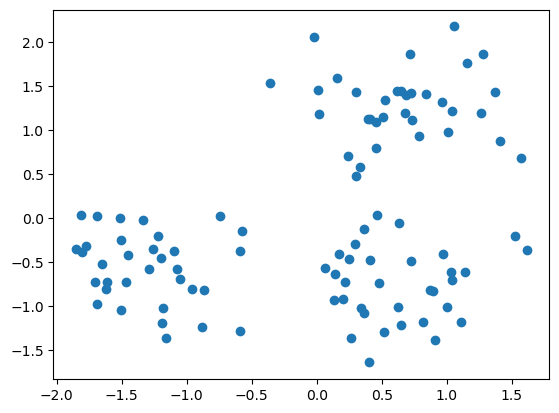

In [3]:
import matplotlib.pyplot as plt
plt.scatter(X[:,0], X[:,1])
plt.show()

In [4]:
import numpy as np
from sklearn import metrics ##计算聚类评估标准
from sklearn.cluster import DBSCAN

db = DBSCAN(eps=0.3, min_samples=10).fit(X)
labels = db.labels_
n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0)
n_noise_ = list(labels).count(-1)

### Demo of DBSCAN
* import DBSCAN 核心算法类
* eps=0.3 邻域半径（决定“多近算邻居”）
* min_samples=10 形成核心点的最少邻居数
* label = db.labels_ 获取所有样本的聚类标签
* n_clusters_ = len(set(labels)) - (1 if -1 in labels else 0) 统计标签集合的唯一值数量
* n_noise_ = list(labels).count(-1) 统计噪声点数量

In [5]:
print("Estimated number of clusters: %d" % n_clusters_)
print("Estimated number of noise points: %d" % n_noise_)
print(f"Homogeneity: {metrics.homogeneity_score(labels_true, labels):.3f}")
print(f"Completeness: {metrics.completeness_score(labels_true, labels):.3f}")
print(f"V-measure: {metrics.v_measure_score(labels_true, labels):.3f}")
print(f"Adjusted Rand Index: {metrics.adjusted_rand_score(labels_true, labels):.3f}")
print(
    "Adjusted Mutual Information:"
    f" {metrics.adjusted_mutual_info_score(labels_true, labels):.3f}"
)
print(f"Silhouette Coefficient: {metrics.silhouette_score(X, labels):.3f}")


Estimated number of clusters: 1
Estimated number of noise points: 86
Homogeneity: 0.159
Completeness: 0.431
V-measure: 0.232
Adjusted Rand Index: 0.078
Adjusted Mutual Information: 0.221
Silhouette Coefficient: 0.177


### The metrics of clusters
Homogeneity（纯度）：每个簇是否只包含单一类别。

Completeness（完整性）：同类样本是否被归到同一簇中。

V-measure：以上两者的调和平均。

Adjusted Rand Index（ARI）：调整后的兰德指数，衡量聚类与真实标签的匹配程度。

Adjusted Mutual Information（AMI）：调整后的互信息，衡量聚类信息与真实标签信息的重叠度。

Silhouette Coefficient（轮廓系数）：只用聚类结果自身（不依赖真实标签），反映聚类紧密度与分离度。

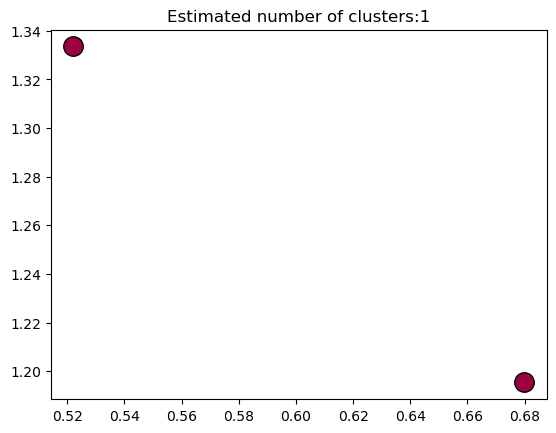

In [6]:
unique_labels = set(labels)
core_samples_mask = np.zeros_like(labels, dtype=bool)
core_samples_mask[db.core_sample_indices_] = True
colors =  [plt.cm.Spectral(each) for each in np.linspace(0, 1, len(unique_labels))]
for k, col in zip(unique_labels, colors):
    if k == -1:
        col = [0, 0, 0, 1]
    class_member_mask = labels == k
    xy = X[class_member_mask & core_samples_mask]
    plt.plot(
        xy[:, 0],
        xy[:, 1],
        "o",
        markerfacecolor=tuple(col),
        markeredgecolor="k",
        markersize=14
    )
plt.title(f"Estimated number of clusters:{n_clusters_}")
plt.show()

### Plot results
* core_samples_mask 布尔掩码,记录哪些点是“核心点”
* colors 使用光谱色图生成不同颜色， 用于区分不同簇
* 噪声点 统一用black
* 核心点 颜色较大，边缘用black
* 非核心点(边缘点) 与核心点同色但较小